# Telcom Churn Project

# Data Understanding, Reading, and Data Cleaning(EDA)

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [246]:
# reading the dataset
df = pd.read_csv('../data/raw/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [247]:
df.shape

(7043, 21)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [249]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [250]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [251]:
# checking for duplicate values
df.duplicated().any()

np.False_

In [252]:
# checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [253]:
# TotalCharges is object (string) but should be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

insight : There are 11 hidden missing values in TotalCharges column
1. We convert TotalCharges to numeric column and then check the null values
2. 11/7043 rows are null meaning - (11/7043) * 100 = 0.156% is missing values in the dataset ~ very small
3. We either impute the null rows with median or simply drop the rows because missing value is 0.15%

In [254]:
# 1. Dropped rows where missing values are present as the null value percentage in the dataset is ~0.15%
# 2. Dropped customerID as it is not useful for analysis
df = df.dropna().drop(columns=['customerID'])
df.shape

(7032, 20)

## Target Variable Analysis

/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_18995/4033511568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


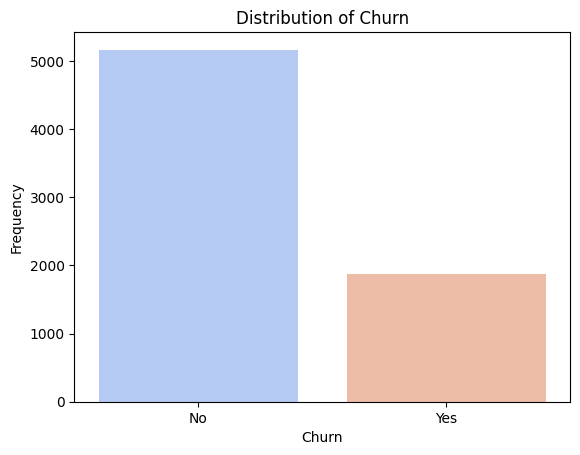

In [255]:
# checking distribution of target column - Churn
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

Insight : The dataset is imbalanced. Most people stayed (0), fewer people left (1).

In [256]:
# checking the distribution of target variable in percentage
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

insight :
No Churn: 73.5%
Churn: 26.5%

1. Imbalanced dataset needs handling
2. Metrics to be used for the problem dataset : Recall, Precision, F1, ROC-AUC

In [257]:
# converting target variable to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1 })
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [258]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Columns overview

In [259]:
# identifying categorical and numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

target_column = 'Churn'
# Remove target column from numerical columns list
numerical_columns.remove(target_column)  

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)  

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

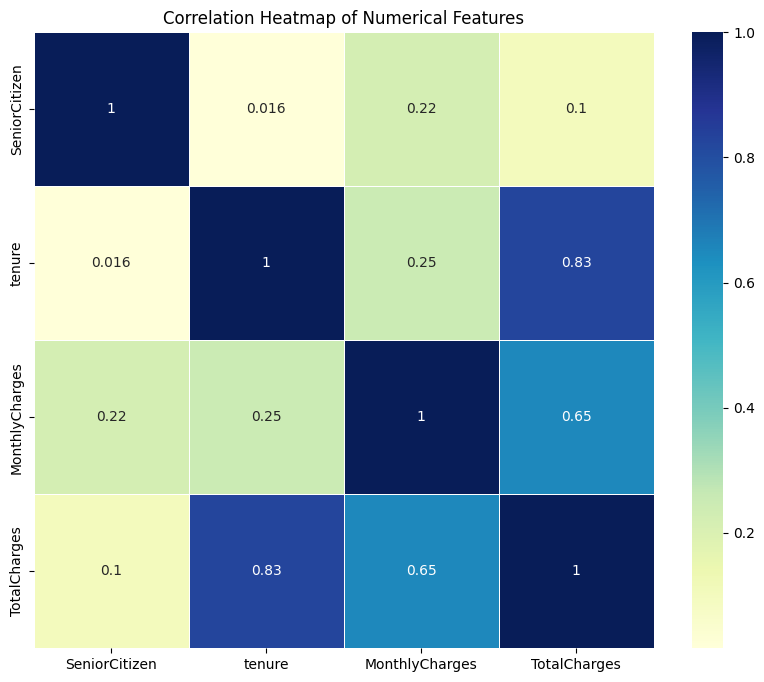

In [260]:
# corelation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

insight :
1. when coefficient is 1 : Perfect positive correlation. Every feature has a 1.0 with itself (the diagonal line).
2. near 0 : no linear relationship, eg - tenure with senior citizen - meaning being a senior doesn't tell you anything about how long they’ve been a customer.
3. Positive Values (0.22, 0.25): As one goes up, the other tends to go up. Here, MonthlyCharges has a slight positive correlation (0.25) with tenure, suggesting that long-term customers might have slightly higher bills.

# Numerical Columns Analysis

In [261]:
# checking skewness of numerical features
df[numerical_columns].skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

insight :
| Skew Value | Meaning       |
| ---------- | ------------- |
| ~0         | Symmetric     |
| 0.5–1      | Moderate skew |
| >1         | Highly skewed |

1. alomst symetric, no transformation needed - tenure, MonthlyCharges(negative)
2. highly skewed - TotalCharges and SeniorCitizen
3. SeniorCitizen is binary(0/1) → not treated as continuous, so Skewness is meaningless for binary variables here.

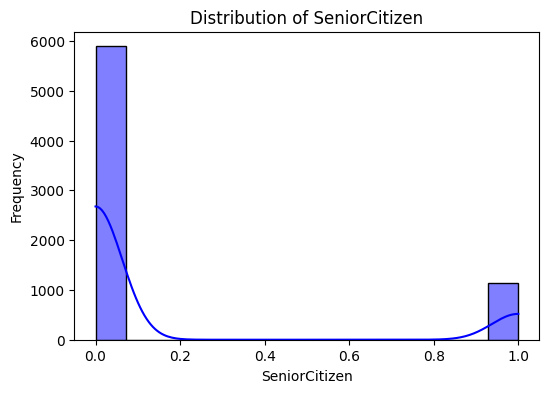

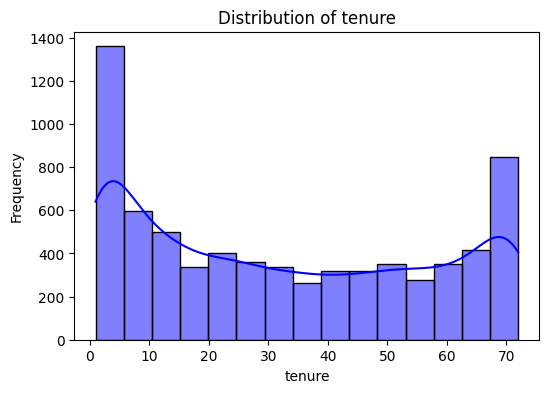

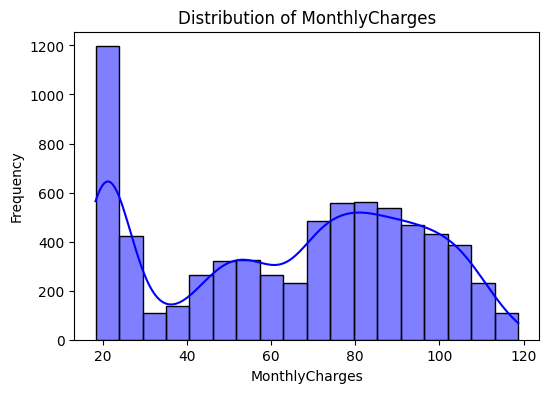

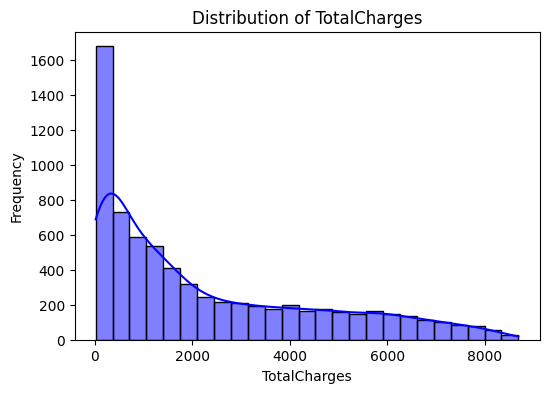

In [262]:
# plotting histograms for numerical features to check their distribution and skewness
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [263]:
# checking the distribution min and max values of TotalCharges & SeniorCitizen to understand the skewness
total_charges_distribution = df['TotalCharges'].describe()
seniorcitizen_distribution = df['SeniorCitizen'].describe()
print("TotalCharges Distribution:\n", total_charges_distribution)
print("\nSeniorCitizen Distribution:\n", seniorcitizen_distribution)

TotalCharges Distribution:
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

SeniorCitizen Distribution:
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


insight :
1. TotalCharges : right skeweked, Tree models can handle skew
2. Logistic regression can handle moderate skew - No log transform needed yet.
3. High TotalCharges = Long-term loyal customer, so we keep the max values(outliers)
4. scaling needed for logistic regression later

# Categorical columns analysis

In [264]:
for col in categorical_columns:
    print(col, df[col].nunique())


gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4


# Data Preprocessing

| Feature Type            | Encoding                   |
| ----------------------- | -------------------------- |
| Numerical               | StandardScaler             |
| Binary categorical      | OneHotEncoder (drop first) |
| Multi-class categorical | OneHotEncoder              |

I am scaling the numerical columns beacuse i will use Logistic regression first
and it is distance-based model.
Scaling helps in convergence and fairness for logistic regression.

In [265]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [266]:
# separating the input features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

print(X.shape)
print(y.shape)

(7032, 19)
(7032,)


## Building the processing pipleline

In [267]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),
    ]
)

### train-test split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Creating Full Pipeline (Preprocessor + Model)
1. Creating the baseline model using LogisticRegression

In [269]:
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [270]:
# train the model on training data 
model.fit(X_train, y_train)

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

## Logistic Regression model metrics evaluation

In [271]:
X_test.shape

(1407, 19)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_probability_res = model.predict_proba(X_test)[:,1]

print("confusion matrix result\n ",confusion_matrix(y_test, y_pred))
print("=================================================================")
print("classification report result\n",classification_report(y_test, y_pred))
print("=================================================================")
print("ROC-AUC:", roc_auc_score(y_test, y_probability_res))


confusion matrix result
  [[918 115]
 [159 215]]
classification report result
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC-AUC: 0.8360739966143986


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


insight for baseline Regression Model metrics for churn(1) :
1. Accuracy - 80% 
2. Precission - 64% - decent, not too many false alarms
3. Recall - 56% 
4. f1-score - 60%
5. ROC-AUC: 83% - model separates classes well

This is fairly good metrics for baseline model, not overrfitting


In [273]:
improved_lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

improved_lr_model.fit(X_train, y_train)

y_pred_improved = improved_lr_model.predict(X_test)
y_probability_res_improved = improved_lr_model.predict_proba(X_test)[:,1]

# Metrics evaluation for improved model
print("=================================================================")
print("confusion matrix result for improved model\n ",confusion_matrix(y_test, y_pred_improved))
print("classification report result for improved model\n",classification_report(y_test, y_pred_improved))
print("=================================================================")
print("ROC-AUC for improved model:", roc_auc_score(y_test, y_probability_res_improved))     

confusion matrix result for improved model
  [[725 308]
 [ 77 297]]
classification report result for improved model
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

ROC-AUC for improved model: 0.8353130128228357


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

insight for improved Regression Model using class weights metrics for churn(1) :
1. Accuracy - 73% - dropped 
2. Precission - 49% - out of all the customers flagged as churn , 49% actually churned
3. Recall - 79% - 
4. f1-score - 61%
5. ROC-AUC: 83% - model separates classes well - same as the baseline model

[[724 309]
[ 77 297]]

TN - 724 (TRUE-NEGATIVE)
FP - 309 (False alarms increased a lot)
FN - 77 (Missed churners reduced)
TP - 297 (Caught more churners)

### Baseline

Missed churners (FN) = 163
Caught churners (TP) = 211
False alarms (FP) = 119

- Lower campaign cost
- Higher churn loss

### Balanced

Missed churners (FN) = 77
Caught churners (TP) = 297
False alarms (FP) = 309

- Higher campaign cost
- Lower churn loss

### Reduced missed churners, but increased false alarms

# Threshold Tuning on Baseline Model to improve both Recall & Precission

In [274]:
# using threshold tuning to improve both recall and precision using the baseline model
# custom threshold value of 0.35 is chosen to balance recall and precision
threshold = 0.35
y_probability_res = model.predict_proba(X_test)[:,1]
y_pred_35 = (y_probability_res >=threshold).astype(int)

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [275]:
# Evaluation metrics for threshold tuned model
print("=================================================================")
print("confusion matrix result for threshold tuned model\n ",confusion_matrix(y_test, y_pred_35))
print("==================================================================")
print("classification report result for threshold tuned model\n",classification_report(y_test, y_pred_35))
print("==================================================================")
print("ROC-AUC for threshold tuned model:", roc_auc_score(y_test, y_probability_res))

confusion matrix result for threshold tuned model
  [[808 225]
 [104 270]]
classification report result for threshold tuned model
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.55      0.72      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC-AUC for threshold tuned model: 0.8360739966143986


## insight after Threshold Tuning to the baseline logistic regression model :
1. TN - 809 -> churners count decreased, more people are staying
2. FP - 224 -> More false flags
3. FN - 107 -> model says more churners
4. TP - 267 -> actual churners, who were predicted and churned

accuracy - 76%
precission - 54%
recall - 71% 
ROC-AUC: 83% - model separates classes well - same as the baseline model and balanced model

# Logistic Regression - linear models comparsion table

## Side-by-Side Comparison

### 1.Baseline (Threshold = 0.5)
| Metric (Churn=1)     | Value |
| -------------------- | ----- |
| Recall               | 56%   |
| Precision            | 64%   |
| Accuracy             | 80%   |
| ROC-AUC              | 0.83  |
| FN (missed churners) | 163   |
| FP (false alarms)    | 119   |

### 2.Logistic + class_weight
| Metric (Churn=1) | Value |
| ---------------- | ----- |
| Recall           | 79%   |
| Precision        | 49%   |
| Accuracy         | 73%   |
| ROC-AUC          | 0.83  |
| FN               | 77    |
| FP               | 309   |

### 3.Threshold Tuned (0.35)
| Metric (Churn=1) | Value |
| ---------------- | ----- |
| Recall           | 71%   |
| Precision        | 54%   |
| Accuracy         | 76%   |
| ROC-AUC          | 0.83  |
| FN               | 107   |
| FP               | 224   |

- Better recall than baseline (71% vs 56%)
- Better precision than balanced model (54% vs 49%)
- Better accuracy than balanced model (76% vs 73%)
- Same ROC-AUC (as expected)
This is a middle ground model.It is more balanced and controlled.

Business Value :
1. Balanced models still minimizes cost effectively.
2. Threshold tuning gives better tradeoff between Recall and Precission and more controlibility, thus retaining churners by flagging at correct 
probabilites & identifying churners earlier.

# Tree Models 
## Random Forest as baseline Model 

Goal - 
1. increase recall without sacrificing precision as badly -> better tradeoff
2. Better ranking, higher ROC-AUC value → better separation between Churners and non-Churners

In [276]:
# Building Random Forest Model and Pipeline

from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ]
)

In [277]:
# train the random forest model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [278]:
# Evaluation metrics for random forest model
y_pred_rf = rf_model.predict(X_test)
y_probability_res_rf = rf_model.predict_proba(X_test)[:,1]

print("=================================================================")
print("confusion matrix result for random forest model\n ",confusion_matrix(y_test, y_pred_rf))
print("==================================================================")
print("classification report result for random forest model\n",classification_report(y_test, y_pred_rf))
print("==================================================================")
print("ROC-AUC for random forest model:", roc_auc_score(y_test, y_probability_res_rf))

confusion matrix result for random forest model
  [[918 115]
 [184 190]]
classification report result for random forest model
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC for random forest model: 0.8163013599349798


insight :
1. ROC dropped from 0.83 → 0.81
2. Recall dropped from 56% → 47%
3. The signal in the data is largely linear.
4. Feature interactions are not dramatically improving separation.
5. Logistic regression is already extracting most signal.
6. Logistic Regression is performing better than random Forest

# Feature Engineering - to improve models
Instead of threshold on churn %,
use threshold on churn difference (max − min)
There is a clear separation gap
The separation is stable and interpretable
It reflects business logic

In [279]:
# df['SeniorCitizen'].unique()
df['SeniorCitizen'].value_counts(dropna=False)


SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [280]:
for col in categorical_columns:
    print("====", col, "====")
    print(df.groupby(col)['Churn'].mean().sort_values(ascending=False))
    print()


==== gender ====
gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

==== Partner ====
Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64

==== Dependents ====
Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64

==== PhoneService ====
PhoneService
Yes    0.267475
No     0.250000
Name: Churn, dtype: float64

==== MultipleLines ====
MultipleLines
Yes                 0.286485
No                  0.250812
No phone service    0.250000
Name: Churn, dtype: float64

==== InternetService ====
InternetService
Fiber optic    0.418928
DSL            0.189983
No             0.074342
Name: Churn, dtype: float64

==== OnlineSecurity ====
OnlineSecurity
No                     0.417787
Yes                    0.146402
No internet service    0.074342
Name: Churn, dtype: float64

==== OnlineBackup ====
OnlineBackup
No                     0.399417
Yes                    0.215670
No internet service    0.074342
Name: Churn, dtype: float64

==== Devi

In [281]:
df['tenure_bin'] = pd.cut(df['tenure'], bins=5)

df.groupby('tenure_bin')['Churn'].mean()


/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_18995/3056085362.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_bin')['Churn'].mean()


tenure_bin
(0.929, 15.2]    0.461976
(15.2, 29.4]     0.248408
(29.4, 43.6]     0.218103
(43.6, 57.8]     0.149947
(57.8, 72.0]     0.073292
Name: Churn, dtype: float64

In [282]:
df['monthly_bin'] = pd.cut(df['MonthlyCharges'], bins=5)

df.groupby('monthly_bin')['Churn'].mean()


/var/folders/0j/xm__613x13l7smp4fldvtq240000gn/T/ipykernel_18995/3303666136.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('monthly_bin')['Churn'].mean()


monthly_bin
(18.15, 38.35]     0.114461
(38.35, 58.45]     0.270189
(58.45, 78.55]     0.295238
(78.55, 98.65]     0.369863
(98.65, 118.75]    0.300573
Name: Churn, dtype: float64

In [283]:
# feature engineering - to detect if new_customer
df['is_new_customer'] = (df['tenure'] <= 12).astype(int)
df.groupby('is_new_customer')['Churn'].mean()

is_new_customer
0    0.171299
1    0.476782
Name: Churn, dtype: float64

In [284]:
risk_services = [
    'TechSupport',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection'
]

df['num_missing_services'] = df[risk_services].apply(
    lambda row: sum(row == 'No'),
    axis=1
)
df['is_electronic_check'] = (df['PaymentMethod'] == 'Electronic check').astype(int)


In [286]:
numerical_columns.extend([
    'is_new_customer',
    'num_missing_services',
    'is_electronic_check'
])
print("Updated Numerical Columns:", numerical_columns)

Updated Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'is_new_customer', 'num_missing_services', 'is_electronic_check', 'is_new_customer', 'num_missing_services', 'is_electronic_check']


In [290]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [291]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [304]:
preprocessor_fe = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)


In [305]:
enhanced_lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor_fe),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [306]:
enhanced_lr_model.fit(X_train, y_train)


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [307]:
y_pred_enhanced = enhanced_lr_model.predict(X_test)
y_prob_enhanced = enhanced_lr_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_enhanced))
print("====================================")
print(classification_report(y_test, y_pred_enhanced))
print("====================================")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_enhanced))


Confusion Matrix:
 [[917 116]
 [173 201]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

ROC-AUC: 0.8346141501571147


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [308]:
rf_model_fe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

rf_model_fe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [309]:
y_pred_enhanced_rf= rf_model_fe.predict(X_test)
y_prob_enhanced_rf = rf_model_fe.predict_proba(X_test)[:,1]

print("Confusion Matrix (Enhanced RF):\n", confusion_matrix(y_test, y_pred_enhanced_rf))
print("====================================")
print(classification_report(y_test, y_pred_enhanced_rf))
print("====================================")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_enhanced_rf))

Confusion Matrix (Enhanced RF):
 [[918 115]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

ROC-AUC: 0.8152245937537209


In [311]:
from xgboost import XGBClassifier
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_fe),
    ('classifier', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])


In [312]:
xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check',
                                                   'is_new_customer',
                                                   'num_missing_services',
                                                   'is_electronic_check']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partne...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [313]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("====================================")
print(classification_report(y_test, y_pred_xgb))
print("====================================")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


Confusion Matrix:
 [[917 116]
 [175 199]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC-AUC: 0.8316841037215731


## Model Validation using Stratified k-fold Cross validation

Instead of training once and testing once, we:
Split data into 5 stratified folds
Trained 5 times
Tested 5 times
Calculated ROC each time

Each score corresponds to:
“Model trained on 80%, tested on 20% — but different 20% each time.”

This reduces randomness.
On average, your model correctly ranks a random churner above a random non-churner 84.5% of the time.


In [303]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf_res = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = cross_val_score(
    enhanced_lr_model,
    X,
    y,
    cv=skf_res,
    scoring='roc_auc'
)

print("Cross-Validated ROC-AUC scores:", cv_auc_scores)
print("Mean ROC-AUC:", np.mean(cv_auc_scores))
print("Std ROC-AUC:", np.std(cv_auc_scores))

Cross-Validated ROC-AUC scores: [0.84636928 0.84938733 0.84475317 0.84531619 0.84114616]
Mean ROC-AUC: 0.8453944261537261
Std ROC-AUC: 0.0026592757992142642


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X

insight :
Earlier single split gave ~0.83.
Now CV gives ~0.845 -> Because CV averages multiple splits and reduces unlucky test splits.

Std = 0.0026 means:
Performance varies only ±0.0026 across folds.
That’s extremely stable.

interpretation :
0.845 ± 0.0026
Range roughly: 0.8428 to 0.848

That is very tight.

1. Model is stable, not-overfitting and consistient ROC-AUC score across data partitions
2. Model is not over-fitting because variance is ~0.0026, very small
3. No fold has extreme drops hence we can say that the enhanced model generalizes well

## Hyperparamter Tuning the XGBoost Model

Tuning the xgboost model even when Logistic Regression gives ~0.845% beacuse -
1. Logistic Regression is linear and i want to try to capture the non-linear relationship in the dataset that can increase the roc-auc score
2. XGBoost captures nonlinear interactions, It may boost extra 0.01–0.03 ROC.
3. we will check the metrics after hyperparameter tuning and write the inferences

For Hyperparamter Tuning the XGBoost Model we will - 
✔ Use StratifiedKFold
✔ Tune using ROC-AUC
✔ Use RandomizedSearchCV
✔ Keep preprocessing inside pipeline
✔ Avoid data leakage

### step 1 - Defining class imbalance weight
This tells that churn class is rare and model should pay more attention to it.

In [314]:
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print(scale_pos_weight)

2.7624398073836276


## insight:
scale_pos_weight is 2.7624398073836276

This means that :
1. The dataset is mildly imbalanced 
2. and for every 1 person who churns(leaves) about 2.76% people stay 

### step 2 - XGB Pipeline

In [315]:
from xgboost import XGBClassifier

xgb_base_model = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

xgb_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor_fe),
        ('classifier', xgb_base_model)
    ]
)

### step 3 - Hyperparameter Search Space

• learning_rate → how fast model learns
• max_depth → model complexity
• subsample → regularization
• colsample → feature randomness
• n_estimators → number of trees

In [317]:
param_dist = {
    'classifier__n_estimators': [200, 300, 500],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

### step 4 - RandomizedSearchCV with Stratified CV

In [320]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=skf_res,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

print("Best Params:\n", random_search.best_params_)
print("Best CV ROC-AUC:\n", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params:
 {'classifier__subsample': 1.0, 'classifier__n_estimators': 500, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}
Best CV ROC-AUC:
 0.8482513194077995


### insight :

- Logistic (5-fold CV)
ROC-AUC = 0.8454 ± 0.0026

- Tuned XGBoost (5-fold CV)
ROC-AUC = 0.8483

- Improvement in ROC-AUC: 
0.8483 − 0.8454 = +0.0029

Given your logistic std = 0.0026:

The improvement is almost within noise range.

That’s 0.29% improvement - Boosting did not unlock new strong nonlinear signal.
The XGB improvement (0.0029) is roughly equal to the fold variation.